In [1]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# Define Time Period and Parameters

In [2]:
START_DATE = dt.datetime(1970,1,1)
END_DATE = dt.datetime(2020,12,31)
T = 252

# Define Asset Allocation

In [3]:
fixed_asset_allocation = {'Four Seasons': {'assets': ['VTI', 'TLT', 'IEF', 'GLD', 'DBC'],
                                         'weights': np.array([0.3, 0.4, 0.15, 0.075, 0.075])},
                          'All Weather': {'assets': ['VT', 'LTPZ', 'EDV', 'VCLT', 'EMLC', 'IAU', 'BCI'],
                                         'weights': [0.35, 0.2, 0.2, 0.075, 0.075, 0.05, 0.05]},
                         'Sixty Forty': {'assets': ['VTI', 'BND'],
                                        'weights': np.array([0.6, 0.4])},
                         'Permanent': {'assets': ['VTI', 'IEF', 'TLT', 'GLD'],
                                      'weights': np.array([0.25, 0.25, 0.25, 0.25])},
                         'SPY (Benchmark)': {'assets': ['SPY'],
                                      'weights': np.array([1])},
                         'Custom Portfolio': {'assets': ['SPY', 'VT', 'TLT', 'GLD'],
                                             'weights': np.array([0.25, 0.25, 0.25, 0.25])}}

# Get Price Data

In [4]:
combined = []

for portfolio in fixed_asset_allocation.keys():
    combined = combined + fixed_asset_allocation[portfolio]['assets']

combined_assets = list(set(combined))
combined_assets

['VTI',
 'IEF',
 'EMLC',
 'LTPZ',
 'VCLT',
 'BCI',
 'GLD',
 'IAU',
 'SPY',
 'DBC',
 'VT',
 'BND',
 'TLT',
 'EDV']

In [5]:
prices = pd.DataFrame()
for asset in combined_assets:
    prices[asset] = web.DataReader(asset, 'yahoo', START_DATE, END_DATE)['Adj Close']
prices.dropna(inplace=True)

In [6]:
prices

,VTI,IEF,EMLC,LTPZ,VCLT,BCI,GLD,IAU,SPY,DBC,VT,BND,TLT,EDV
Date,,,,,,,,,,,,,,
2017-03-31,112.808067,98.273743,29.286232,60.400505,76.614853,23.018423,118.720001,12.010000,218.867828,14.778238,59.669853,72.413513,110.381607,95.948029
2017-04-03,112.529121,98.757484,29.270321,60.783554,77.150230,23.018423,119.349998,12.070000,218.487167,14.719940,59.614960,72.676651,111.495003,97.260124
2017-04-04,112.584915,98.617668,29.333897,60.546436,76.859444,22.966002,119.620003,12.090000,218.626434,14.865684,59.651543,72.596123,110.890244,96.604080
2017-04-05,112.129272,98.804054,29.317997,60.892986,77.039055,23.078196,119.620003,12.100000,217.976532,14.894831,59.422832,72.658745,111.229263,96.932106
2017-04-06,112.482620,98.738831,29.286217,60.792679,77.021912,23.137974,119.180000,12.050000,218.589294,14.933696,59.514320,72.685570,111.064301,96.647240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,192.179596,119.574692,32.696136,87.798271,109.947479,21.639999,176.350006,17.920000,367.795380,14.600000,91.351700,87.539337,156.704742,151.297256
2020-12-28,193.395523,119.584663,32.705978,87.878036,109.878014,21.370001,175.710007,17.870001,370.955048,14.510000,91.770607,87.509499,156.774475,151.257446
2020-12-29,192.588226,119.564697,32.744514,87.738449,109.947479,21.480000,176.350006,17.910000,370.247345,14.550000,91.950142,87.539337,156.575241,150.978882


# Portfolio Performance Analysis

In [7]:
#portfolios = ['All Weather', 'Sixty Forty', 'Permanent', 'SPY (Benchmark)']

stats_summary = pd.DataFrame(columns = ['Portfolio', 'CAGR (%)', 'MDD (%)', 'CAGR / MDD'])
combined_cumulatives = pd.DataFrame()
for portfolio in fixed_asset_allocation.keys():
    
    port_data = pd.DataFrame()
    
    # get corresponding price data
    for column in prices.columns:
        if column in fixed_asset_allocation[portfolio]['assets']:
            port_data[column] = prices[column]
    
    # compute daily returns of individual assets
    daily_returns = port_data.pct_change()
    
    # compute daily returns of the portfolio    
    daily_returns[portfolio] = daily_returns.dot(fixed_asset_allocation[portfolio]['weights'])
    
    # compute cumulative returns
    cumulative_returns = (1 + daily_returns).cumprod()
    cumulative_returns.fillna(1, inplace=True)
    
    # save cumulative returns of the portfolio for comparison
    
    if portfolio == 'All Weather':
        allWeather = cumulative_returns
    
    if portfolio == 'Sixty Forty':
        sixtyForty = cumulative_returns
    
    if portfolio == 'Permanent':
        permanent = cumulative_returns
    
    combined_cumulatives[portfolio] = cumulative_returns[portfolio]
    
    
    # compute CAGR
    cagr = cumulative_returns**(T/len(cumulative_returns.index)) - 1
    portfolio_cagr = cagr.loc[cagr.index[-1], portfolio]

    # compute MDD
    cumulative_returns = cumulative_returns[portfolio]
    previous_peaks = cumulative_returns.cummax()
    drawdown = (cumulative_returns - previous_peaks) / previous_peaks
    #drawdown.plot()
    portfolio_mdd = drawdown.min()
    
    # save CAGR and MDD for each portfolio
    
    stats_summary = stats_summary.append({'Portfolio': portfolio,
                                         'CAGR (%)': portfolio_cagr * 100,
                                         'MDD (%)': portfolio_mdd* 100,
                                         'CAGR / MDD': abs(portfolio_cagr / portfolio_mdd).round(2)}, ignore_index=True)   

Text(0.5, 1.0, 'Portfolio Performance Comparison')

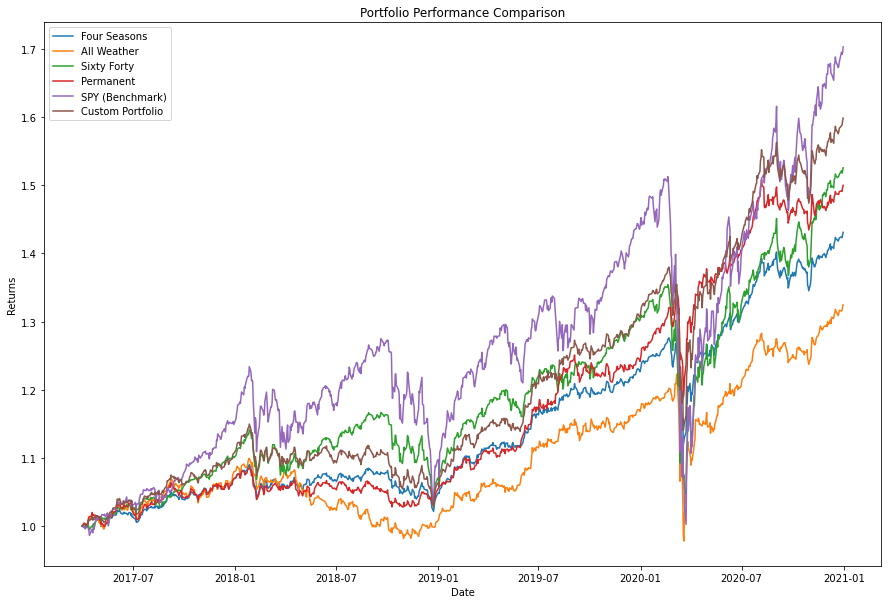

In [8]:
plt.figure(figsize=(15,10))
plt.plot(combined_cumulatives)
plt.legend(combined_cumulatives.columns)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Portfolio Performance Comparison')

In [9]:
stats_summary.set_index('Portfolio', inplace=True)
stats_summary.sort_values('CAGR / MDD', ascending=False)

,CAGR (%),MDD (%),CAGR / MDD
Portfolio,,,
Permanent,11.401078,-11.766578,0.97
Four Seasons,10.013391,-12.278036,0.82
Custom Portfolio,13.305904,-17.358383,0.77
Sixty Forty,11.905128,-22.697852,0.52
SPY (Benchmark),15.231064,-33.717255,0.45
All Weather,7.771156,-20.004451,0.39


Text(0.5, 1.0, 'All Weather Portfolio')

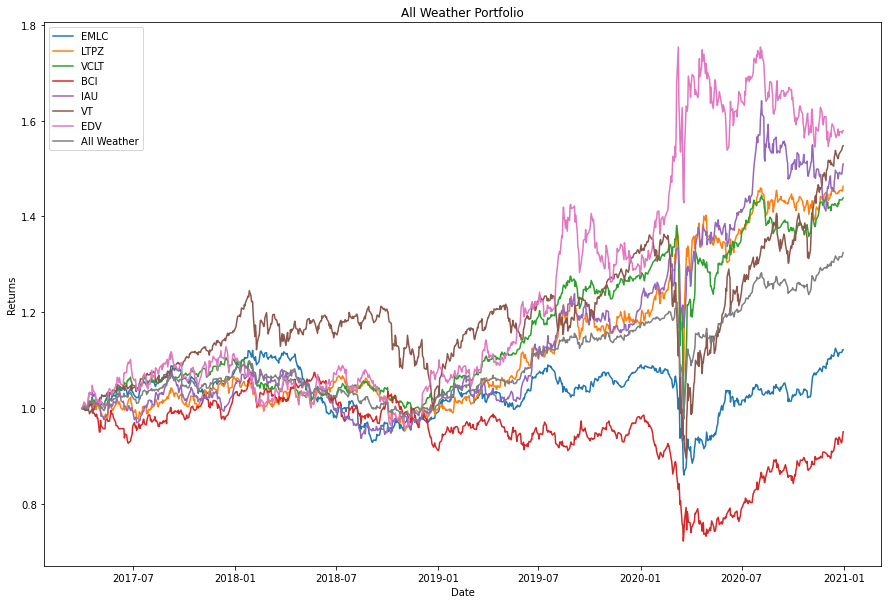

In [10]:

plt.figure(figsize=(15,10))
plt.plot(allWeather)
plt.legend(allWeather.columns)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('All Weather Portfolio')


Text(0.5, 1.0, 'Permanent Portfolio')

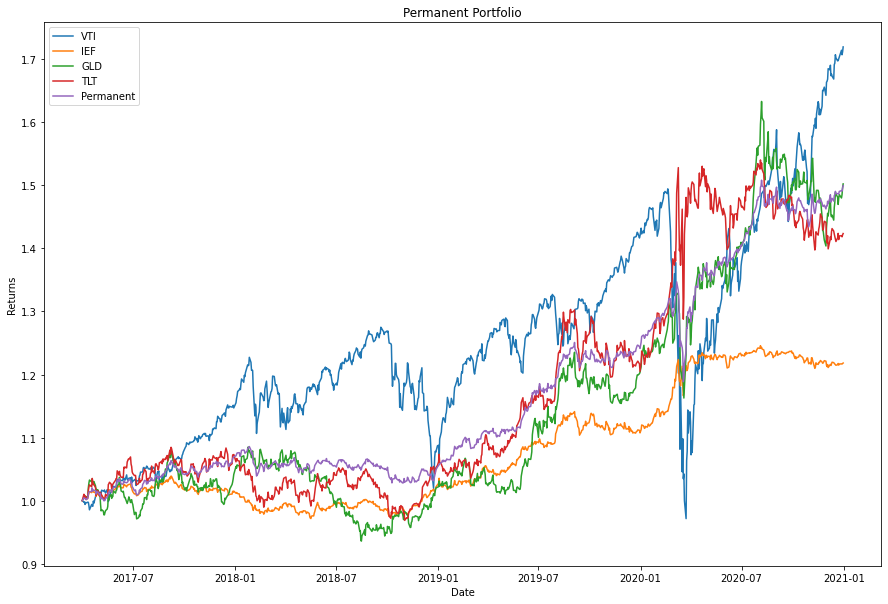

In [11]:
plt.figure(figsize=(15,10))
plt.plot(permanent)
plt.legend(permanent.columns)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Permanent Portfolio')

Text(0.5, 1.0, '60% Equity 40% Bond Portfolio')

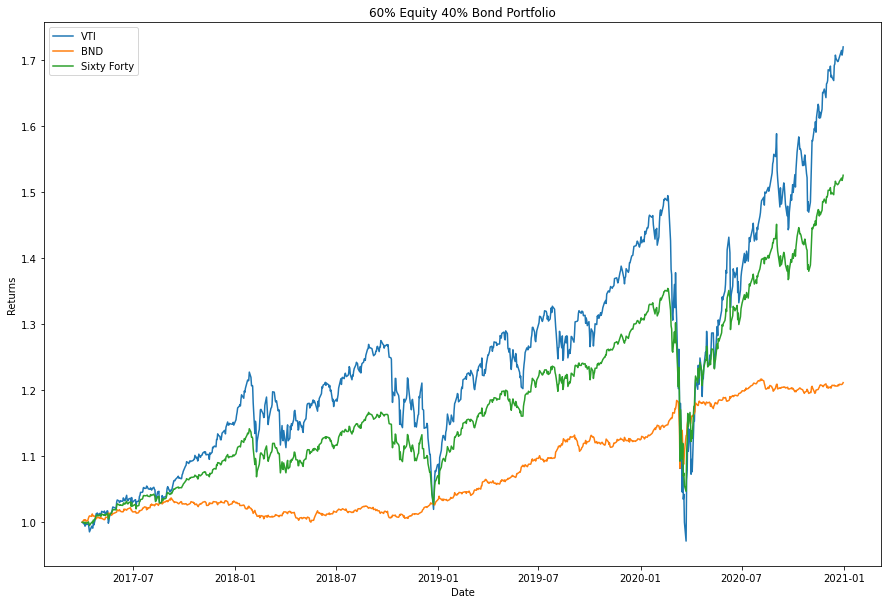

In [12]:
plt.figure(figsize=(15,10))
plt.plot(sixtyForty)
plt.legend(sixtyForty.columns)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('60% Equity 40% Bond Portfolio')